In [1]:
import pandas as pd
import shapely.geometry as geom
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

In [2]:
pics = gpd.read_file("Picture_coords/pic_coords.shp")
fields = gpd.read_file("fields_corrected/fields_corrected.shp")

In [3]:
for i in range(0,len(fields)):
    if(fields['crop_list'][i] == None):
        fields['crop_list'][i] = 'UNKNOWN'

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
field1 = pics["geometry"][0]

In [5]:
def container(x):
    """This function applies the contain function which 
    determins if the coordinates of crop field are in a photo
    """
    return(field1.intersects(x))
nvdicrops = fields[fields['geometry'].apply(container)]

In [6]:
colors = ['xkcd:purple','xkcd:green','xkcd:blue','xkcd:pink','xkcd:brown','xkcd:red',
          'xkcd:light blue','xkcd:teal','xkcd:orange','xkcd:light green','xkcd:magenta',
          'xkcd:yellow','xkcd:sky blue','xkcd:grey','xkcd:lime green','xkcd:olive']

In [8]:
crops = nvdicrops['crop_list'].unique()

C:\Users\marce\Anaconda3\lib\site-packages\PIL\Image.py:2514: DecompressionBombWarning: Image size (118024200 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


Text(23.5,0.5,'Longitude')

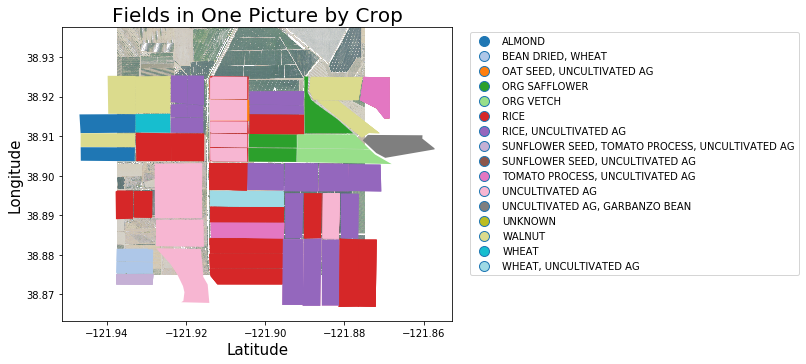

In [76]:
import matplotlib.axis
fig, ax = plt.subplots(1, figsize=(7,7))
plt.imshow(plt.imread("D:/NAIP GEOTIFF/m_3812101_se_10_h_20160711/m_3812101_se_10_h_20160711.tif"), extent=(pics.iloc[0]["west"], pics.iloc[0]["east"], pics.iloc[0]["south"], pics.iloc[0]["north"]))
nvdicrops.plot(ax = ax,column = 'crop_list',cmap = 'tab20', legend = True)
l=ax.get_legend()
l.set_bbox_to_anchor((1, 1, .9, 0))
#plt.plot(point_x, point_y, marker='o', markersize=3, color="red")
ax.set_title("Fields in One Picture by Crop", fontsize = 20)
ax.set_xlabel("Latitude", fontsize = 15)
ax.set_ylabel("Longitude", fontsize = 15)

NameError: name 'point_x' is not defined

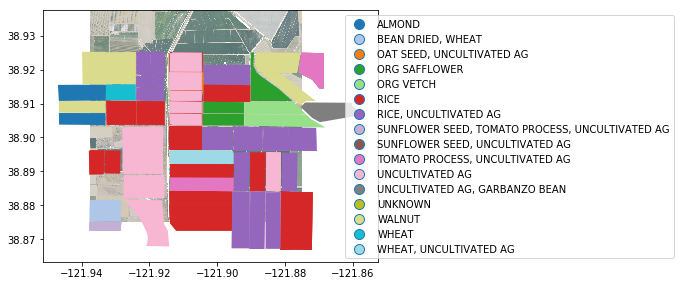

In [17]:
import matplotlib.axis
fig, ax = plt.subplots(1, figsize=(6,9))
plt.imshow(plt.imread("D:/smaller_photos/m_3812101_se_10_h_20160711.tif"), extent=(pics.iloc[0]["west"], pics.iloc[0]["east"], pics.iloc[0]["south"], pics.iloc[0]["north"]))
nvdicrops.plot(ax = ax,column = 'crop_list',cmap = 'tab20', legend = True)
l=ax.get_legend()
l.set_bbox_to_anchor((1, 1, .9, 0))
#plt.plot(point_x, point_y, marker='o', markersize=3, color="red")
ax.set_title("Fields in One Picture by Crop", fontsize = 20)
ax.set_xlabel("Latitude", fontsize = 15)
ax.set_ylabel("Longitude", fontsize = 15)

In [7]:
from osgeo import gdal

In [10]:
ds = gdal.Open("D:/NAIP GEOTIFF/m_3812101_se_10_h_20160711/m_3812101_se_10_h_20160711.tif")

In [11]:
a= ds.ReadAsArray()

In [12]:
y = a.shape[1]
x = a.shape[2]

In [99]:
lat_thing = abs(pics.iloc[0]["west"]- pics.iloc[0]["east"])/a.shape[2]
lat_thing

1.2899896800825593e-05

In [101]:
long_thing = abs(pics.iloc[0]["south"]- pics.iloc[0]["north"])/a.shape[1]
long_thing

1.026272577996716e-05

In [122]:
import numpy as np
x_points = np.ndarray(shape = ( a.shape[2],1))
y_points = np.ndarray(shape = (a.shape[1], 1))
#i*lat_thing + pics.iloc[0]["west"]
#point_y = -2000*long_thing + pics.iloc[0]["north"]

In [123]:
for i in range(0, a.shape[2]):
    x_points[i] = i*lat_thing + pics.iloc[0]["west"]
for i in range(0, a.shape[1]):
    y_points[i] = -i*long_thing + pics.iloc[0]["north"]
    

In [124]:
x_points

array([[-121.9375   ],
       [-121.9374871],
       [-121.9374742],
       ..., 
       [-121.8750387],
       [-121.8750258],
       [-121.8750129]])

In [125]:
y_points

array([[ 38.9375    ],
       [ 38.93748974],
       [ 38.93747947],
       ..., 
       [ 38.87503079],
       [ 38.87502053],
       [ 38.87501026]])

In [127]:
(float(x_points[1000]),float(y_points[2000]))

(-121.92460010319917, 38.916974548440066)

In [142]:
counties = gpd.read_file("cb_2016_us_county_500k/cb_2016_us_county_500k.shp")
cali = counties[counties.STATEFP == "06"]
keep = ["Yolo", "Lake", "Colusa", "Sutter", "Sacramento", "Solano", "Napa"]
yolo = cali[cali.NAME.isin(keep)]


Text(44.3617,0.5,'Longitude')

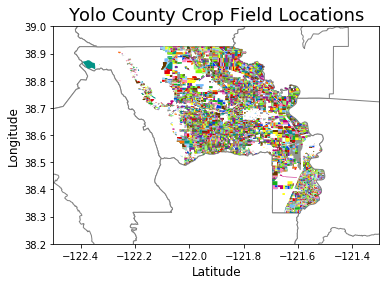

In [151]:
ax = yolo.plot(color = "white", edgecolor = "gray")
fields.plot(ax= ax,color = colors)
ax.set_xlim([-122.5, -121.3])
ax.set_ylim([38.2, 39])
ax.set_title("Yolo County Crop Field Locations", fontsize = 18)
ax.set_xlabel("Latitude", fontsize = 12)
ax.set_ylabel("Longitude", fontsize = 12)

In [46]:
#fields = gpd.read_file("Crops_2016/2016_Crops.shp")
pics = gpd.read_file("Picture_coords/pic_coords.shp")
pics.crs = {"init":"epsg:4326"}
pics = pics.to_crs("+proj=aea +lat_1=34 +lat_2=40.5 +lat_0=0 +lon_0=-120 +x_0=0 +y_0=-4000000 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs")


In [13]:
x,y =field1.exterior.coords.xy

In [14]:
x

array('d', [-167773.51849378858, -162362.18687389186, -162499.56225543824, -167915.47242752297, -167773.51849378858])

In [13]:
import cartopy.crs as ccrs

In [15]:
proj = ccrs.epsg(3310)